In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import torch
import seaborn as sns
import copy

In [2]:
import sys
sys.path.append('code/BalancingControl')
import tmaze_utils as tu
import inference_utils as iu
import inference as inf

import misc

Running on device cpu
torch threads 1


In [3]:
groups = ["control", "exposed"]

agents = ["BCC_2param_", "BCC_context_obs_2param_"]

In [4]:
results_dir = os.path.abspath('results')
inference_folder = os.path.join(results_dir, "inference")
print(inference_folder)

/home/sarah/src/TMaze/results/inference


In [5]:
results = {}
data = {}
num_steps = 400

for grp in groups:
    base_dir = "processed_data"
    fname_data = os.path.join(base_dir, f"TMaze_{grp}_structured_data_context.json")
    structured_data = misc.load_file(fname_data, fname_data)
    data[grp] = structured_data
    for agt in agents:
        fname_base = agt+grp+"_inference_"
        fname_str = fname_base + str(num_steps)+'_'+str(7)+'agents'
        # define folder where we want to save data
        base_dir = os.path.join(inference_folder,fname_base[:-1])
        mean_df, sample_df, locs_df = iu.load_samples(base_dir, fname_str) 
        print(f"{agt}{grp}")
        results[f"{agt}{grp}"] = {}
        results[f"{agt}{grp}"]["mean_df"] = mean_df
        results[f"{agt}{grp}"]["sample_df"] = sample_df
        results[f"{agt}{grp}"]["locs_df"] = locs_df

BCC_2param_control
BCC_context_obs_2param_control
BCC_2param_exposed
BCC_context_obs_2param_exposed


In [6]:
base_dir = "processed_data"
fname_plot_df = os.path.join(base_dir, "plot_df.csv")
plot_df = pd.read_csv(fname_plot_df)

In [7]:
plot_df["correct"][plot_df["trial_type"]=="early test"]

50      1.0
51      0.0
52      0.0
53      0.0
54      0.0
       ... 
1480    0.0
1481    1.0
1482    0.0
1483    1.0
1484    1.0
Name: correct, Length: 70, dtype: float64

In [8]:
plot_df[plot_df["trial_type"]=="early test"].groupby(["animal", "group"])["correct"].mean()

animal  group  
1.0     control    0.2
2.0     control    0.4
3.0     control    0.2
4.0     control    0.4
5.0     control    0.6
6.0     control    0.4
7.0     control    0.6
10.0    exposed    0.6
11.0    exposed    0.4
12.0    exposed    0.2
13.0    exposed    0.4
14.0    exposed    0.6
15.0    exposed    0.6
16.0    exposed    0.6
Name: correct, dtype: float64

In [9]:
plot_df[plot_df["trial_type"]=="late test"].groupby(["animal", "group"])["correct"].mean()

animal  group  
1.0     control    0.8
2.0     control    0.8
3.0     control    0.8
4.0     control    0.4
5.0     control    0.6
6.0     control    0.8
7.0     control    0.8
10.0    exposed    0.8
11.0    exposed    0.4
12.0    exposed    0.6
13.0    exposed    0.6
14.0    exposed    0.4
15.0    exposed    0.4
16.0    exposed    0.2
Name: correct, dtype: float64

In [10]:
results["BCC_2param_exposed"]

{'mean_df':    Unnamed: 0  inferred dec temp  subject  inferred habitual tendency
 0           0           1.068921        0                    3.868470
 1           1           0.682863        1                    2.978298
 2           2           0.788679        2                    2.391287
 3           3           0.893360        3                    2.911467
 4           4           0.594853        4                    2.268394
 5           5           0.549614        5                    2.399441
 6           6           0.405365        6                    2.724437,
 'sample_df':       Unnamed: 0  dec temp  habitual tendency  subject
 0              0  1.238106           6.253656        0
 1              1  0.430554           2.353396        1
 2              2  0.830417           1.948180        2
 3              3  1.127694           1.319998        3
 4              4  1.128127           1.110601        4
 ...          ...       ...                ...      ...
 3495        34

In [11]:
exposed_early_accuracy = plot_df[plot_df["trial_type"]=="early test"][plot_df["group"]=="exposed"].groupby(["animal"])["correct"].mean().values
exposed_late_accuracy = plot_df[plot_df["trial_type"]=="late test"][plot_df["group"]=="exposed"].groupby(["animal"])["correct"].mean().values

exposed_dec_temp = results["BCC_2param_exposed"]["mean_df"]["inferred dec temp"]
exposed_hab_tend = results["BCC_2param_exposed"]["mean_df"]["inferred habitual tendency"]

/tmp/ipykernel_12981/4002650370.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exposed_early_accuracy = plot_df[plot_df["trial_type"]=="early test"][plot_df["group"]=="exposed"].groupby(["animal"])["correct"].mean().values
/tmp/ipykernel_12981/4002650370.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exposed_late_accuracy = plot_df[plot_df["trial_type"]=="late test"][plot_df["group"]=="exposed"].groupby(["animal"])["correct"].mean().values


In [12]:
exposed_dict = {"early acc": exposed_early_accuracy, "late acc": exposed_late_accuracy, "dec temp": exposed_dec_temp, "hab tend": exposed_hab_tend}

exposed_df = pd.DataFrame(exposed_dict)

In [13]:
exposed_df.corr()

,early acc,late acc,dec temp,hab tend
early acc,1.000000,-0.279078,-0.289129,0.191145
late acc,-0.279078,1.000000,0.974761,0.604768
dec temp,-0.289129,0.974761,1.000000,0.700000
hab tend,0.191145,0.604768,0.700000,1.000000


In [14]:
control_early_accuracy = plot_df[plot_df["trial_type"]=="early test"][plot_df["group"]=="control"].groupby(["animal"])["correct"].mean().values
control_late_accuracy = plot_df[plot_df["trial_type"]=="late test"][plot_df["group"]=="control"].groupby(["animal"])["correct"].mean().values

control_dec_temp = results["BCC_2param_control"]["mean_df"]["inferred dec temp"]
control_hab_tend = results["BCC_2param_control"]["mean_df"]["inferred habitual tendency"]

/tmp/ipykernel_12981/306163813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_early_accuracy = plot_df[plot_df["trial_type"]=="early test"][plot_df["group"]=="control"].groupby(["animal"])["correct"].mean().values
/tmp/ipykernel_12981/306163813.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_late_accuracy = plot_df[plot_df["trial_type"]=="late test"][plot_df["group"]=="control"].groupby(["animal"])["correct"].mean().values


In [15]:
control_dict = {"early acc": control_early_accuracy, "late acc": control_late_accuracy, "dec temp": control_dec_temp, "hab tend": control_hab_tend}

control_df = pd.DataFrame(control_dict)

In [16]:
control_df.corr()

,early acc,late acc,dec temp,hab tend
early acc,1.000000,-0.259437,0.851788,-0.480655
late acc,-0.259437,1.000000,-0.402708,0.162559
dec temp,0.851788,-0.402708,1.000000,-0.288498
hab tend,-0.480655,0.162559,-0.288498,1.000000


In [17]:
from scipy.stats import ttest_ind

In [18]:
ttest_ind(control_dec_temp, exposed_dec_temp)

TtestResult(statistic=-1.2399240562616032, pvalue=0.23870288666843922, df=12.0)

In [19]:
ttest_ind(control_hab_tend, exposed_hab_tend)

TtestResult(statistic=1.081459484430222, pvalue=0.3007472753922606, df=12.0)

In [20]:
print(np.append(control_early_accuracy, exposed_early_accuracy).shape)

print(exposed_early_accuracy.shape)

(14,)
(7,)


In [21]:
group_comp_dict = {"group": ["control"]*7+["exposed"]*7, "early acc": np.append(control_early_accuracy, exposed_early_accuracy), 
                   "late acc": np.append(control_late_accuracy, exposed_late_accuracy), "dec temp": np.append(control_dec_temp, exposed_dec_temp), "hab tend": np.append(control_hab_tend,exposed_hab_tend)}

group_comp_df = pd.DataFrame(group_comp_dict)

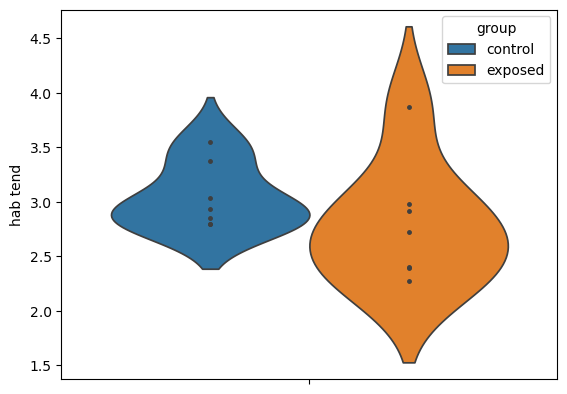

In [22]:
plt.figure()
sns.violinplot(data=group_comp_df, y="hab tend", hue="group", inner="point")
plt.show()

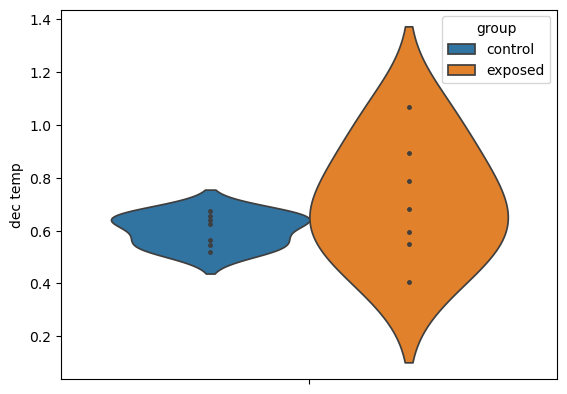

In [23]:
plt.figure()
sns.violinplot(data=group_comp_df, y="dec temp", hue="group", inner="point")
plt.show()

<Figure size 640x480 with 0 Axes>

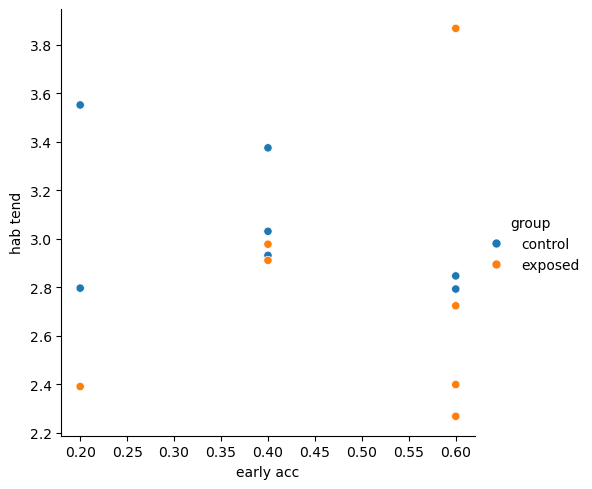

<Figure size 640x480 with 0 Axes>

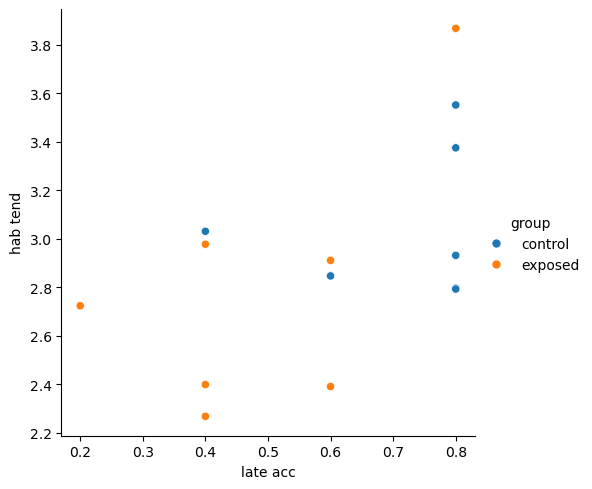

In [29]:
plt.figure()
sns.relplot(data=group_comp_df, y="hab tend", x="early acc", hue="group")
plt.show()

plt.figure()
sns.relplot(data=group_comp_df, y="hab tend", x="late acc", hue="group")
plt.show()

<Figure size 640x480 with 0 Axes>

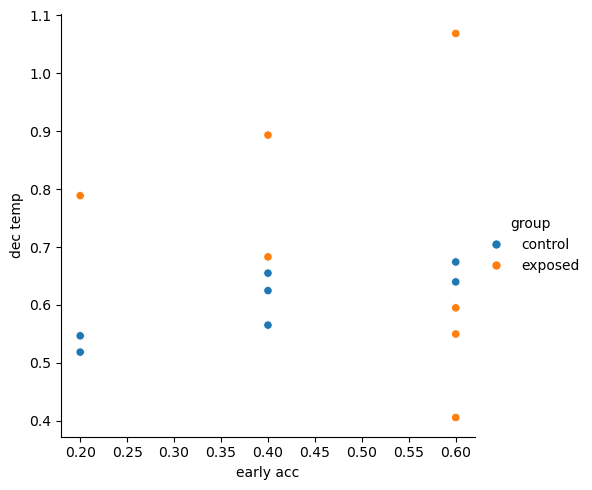

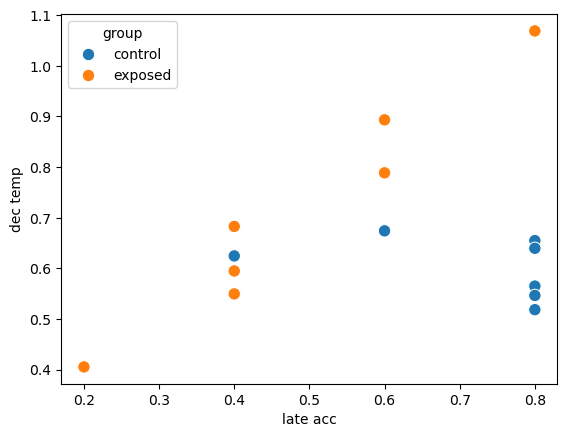

In [48]:
plt.figure()
sns.relplot(data=group_comp_df, y="dec temp", x="early acc", hue="group", sizes=(5))
plt.show()

plt.figure()
sns.scatterplot(data=group_comp_df, y="dec temp", x="late acc", hue="group", marker="o", s=80)#sizes=(200,200))
plt.show()